In [1]:
from typing import List, Dict, Tuple
import pickle
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("times.pkl", "rb") as f:
    times = pickle.load(f)

In [3]:
orig = defaultdict(lambda: [])
nb = defaultdict(lambda: [])
pb = defaultdict(lambda: [])
pyo3 = defaultdict(lambda: [])

In [4]:
for (length, order, exp), time in times.items():
    length = int(length)
    order = int(order)

    orig[(length, order)].append(time["orig"])
    nb[(length, order)].append(time["nb"])
    pb[(length, order)].append(time["pb"])
    pyo3[(length, order)].append(time["pyo3"])

In [5]:
lengths = sorted(set(key[0] for key in orig.keys()))
orders = sorted(set(key[1] for key in orig.keys()))

In [6]:
def make_df(dc: Dict[Tuple[int, int], List[float]]):
    df = [pd.DataFrame(index=lengths, columns=orders) for i in range(2)]
    for (index, column), value in dc.items():
        df[0].at[index, column] = np.mean(value)
        df[1].at[index, column] = np.std(value)
    return df

orig_df = make_df(orig)
nb_df = make_df(nb)
pb_df = make_df(pb)
pyo3_df = make_df(pyo3)

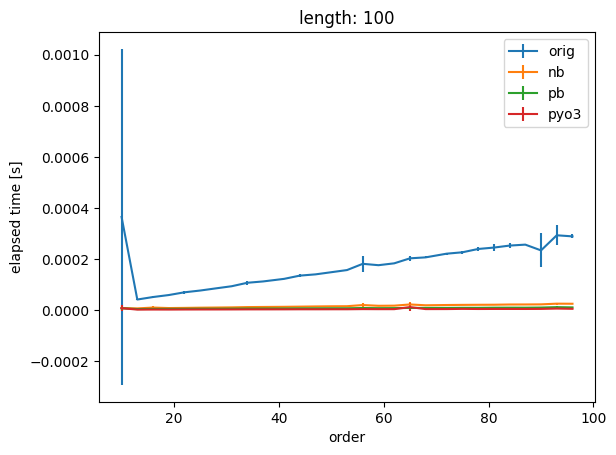

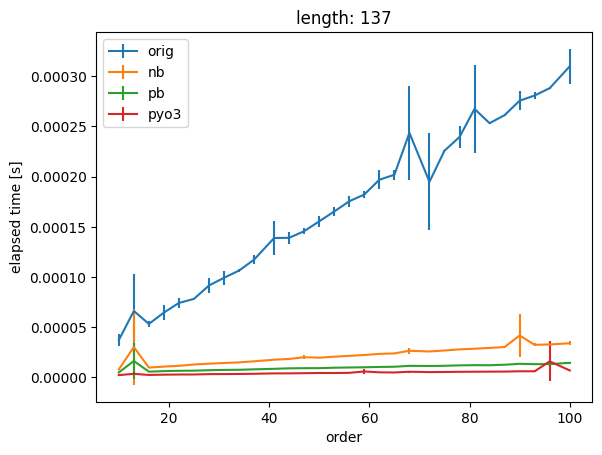

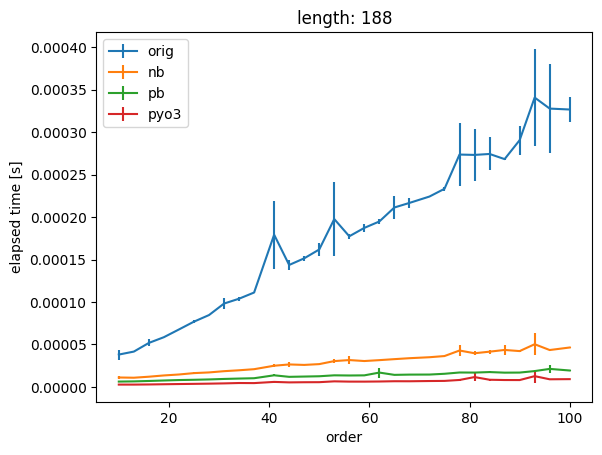

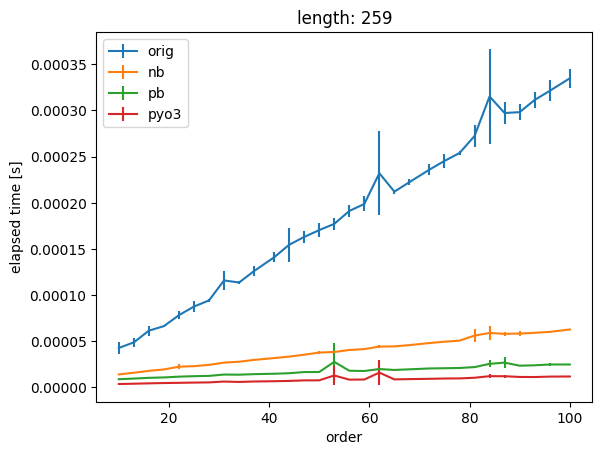

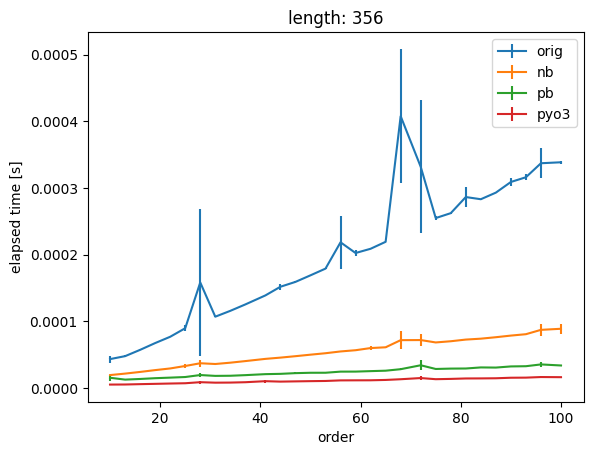

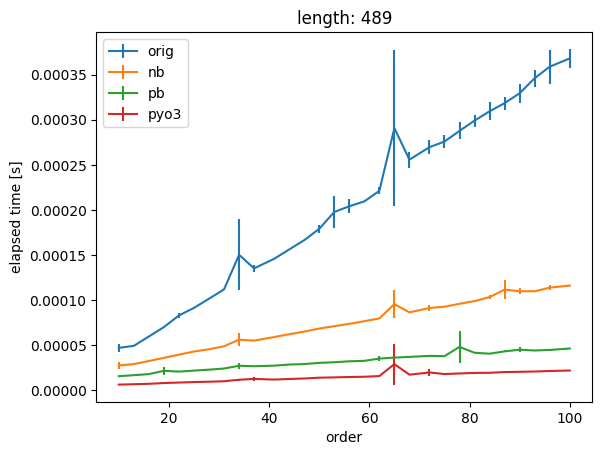

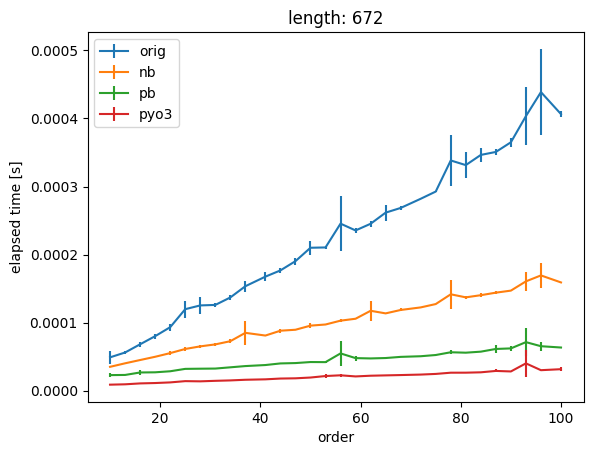

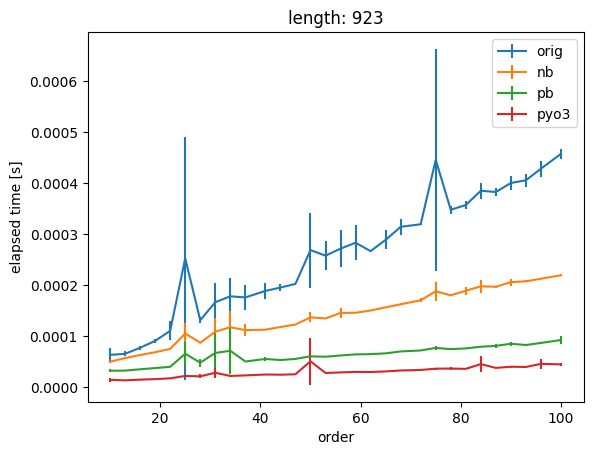

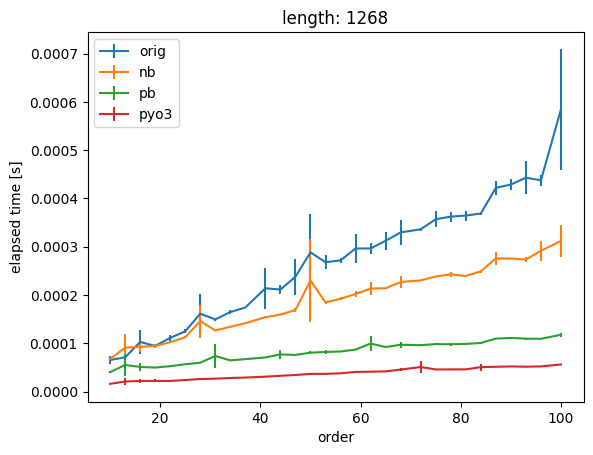

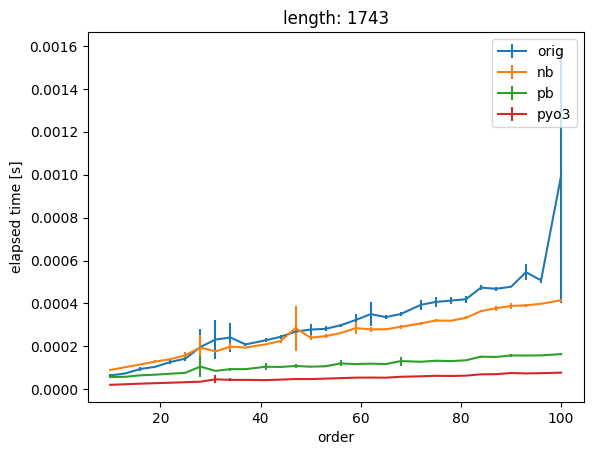

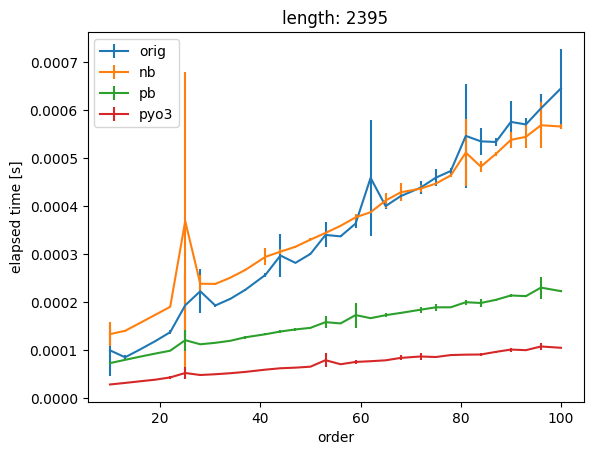

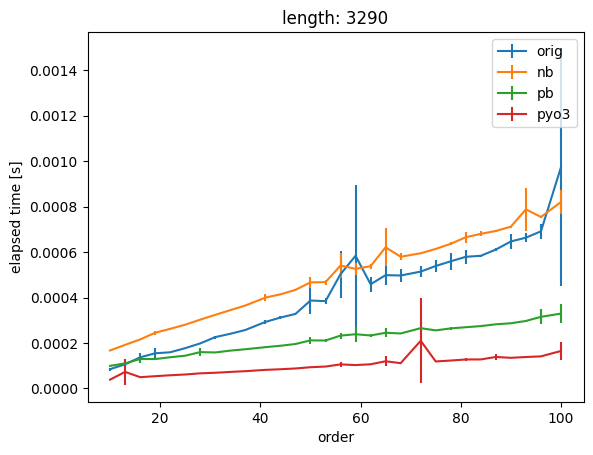

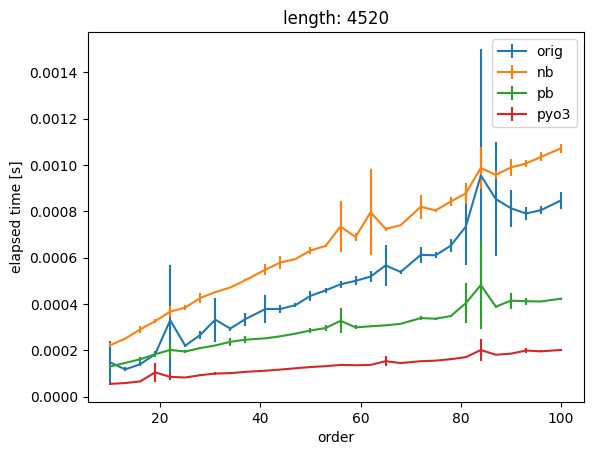

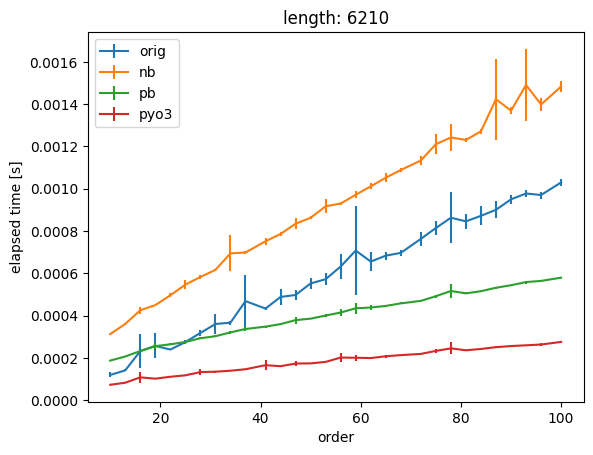

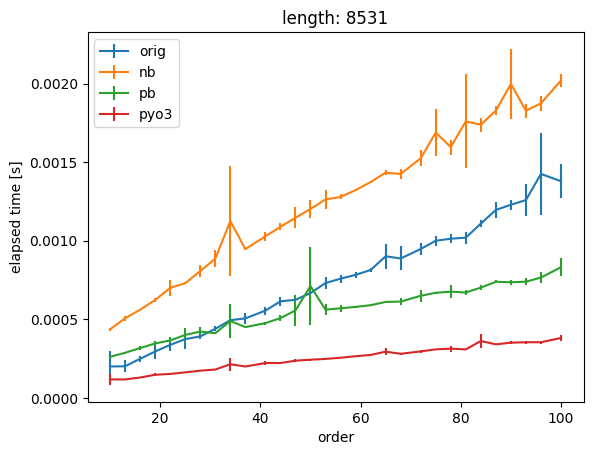

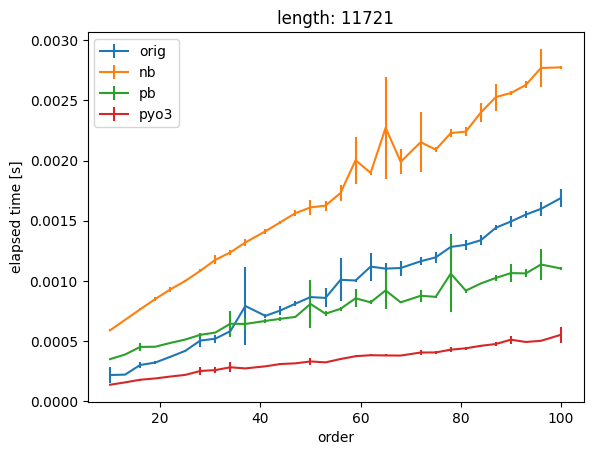

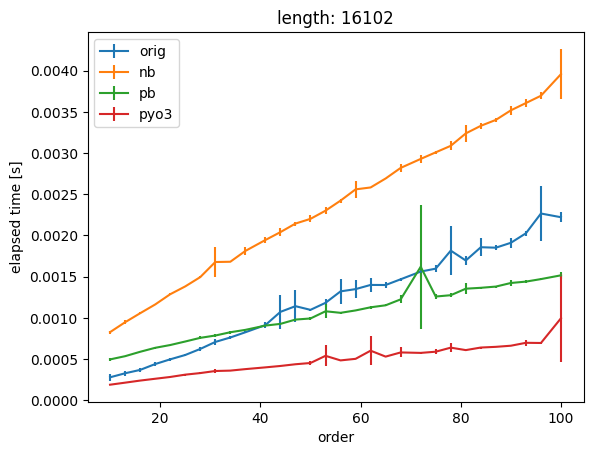

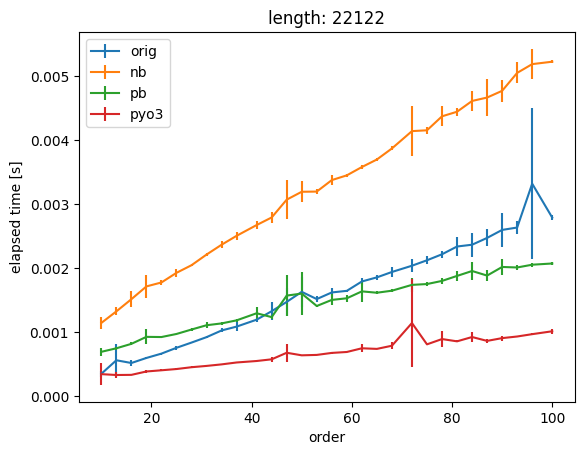

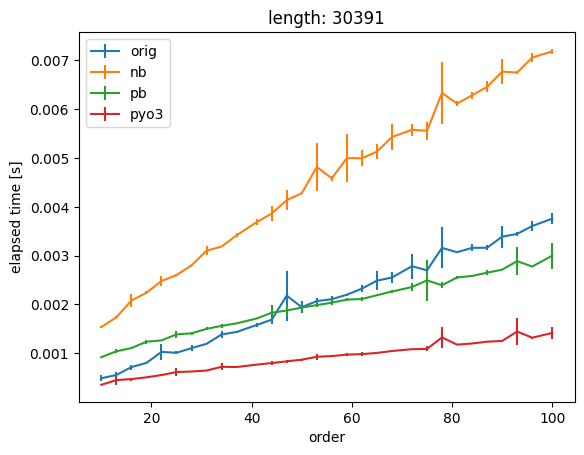

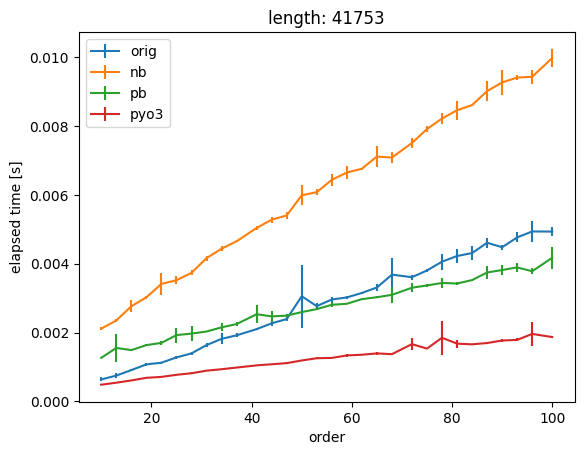

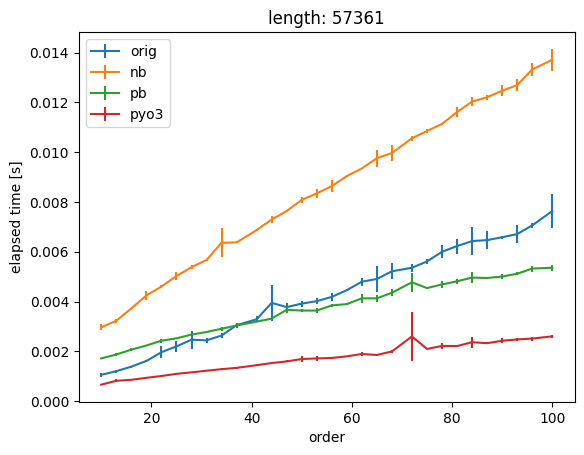

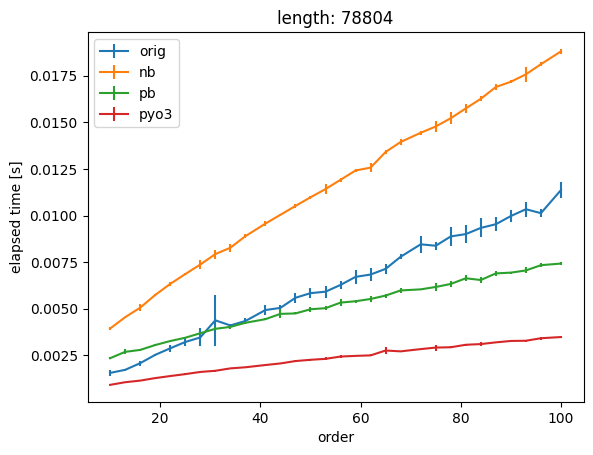

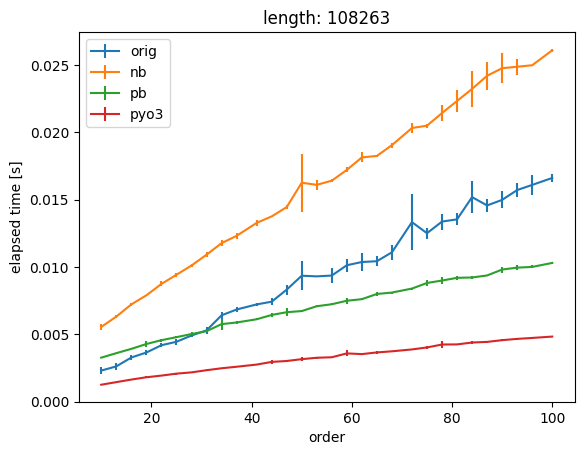

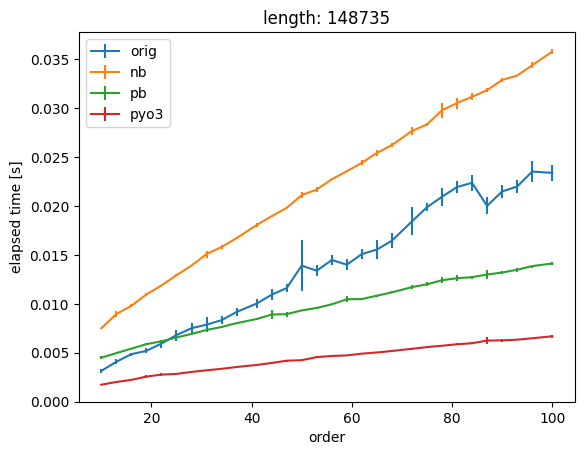

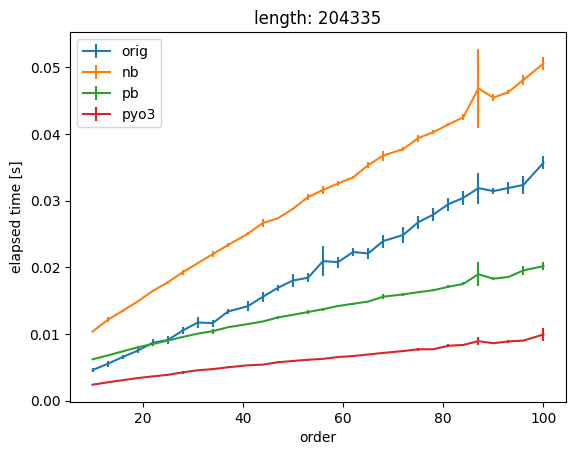

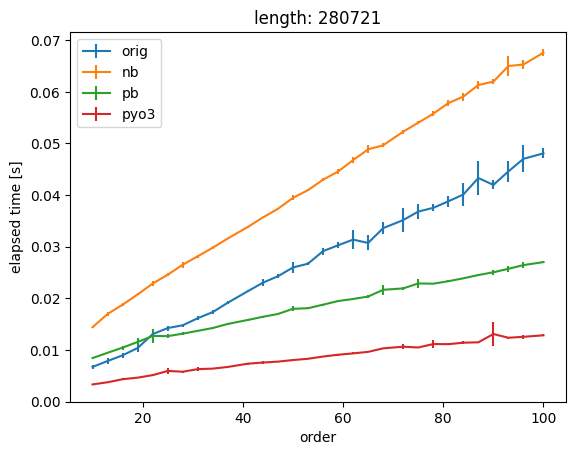

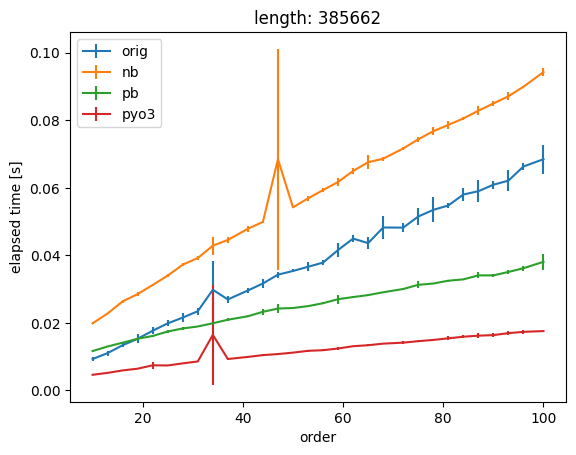

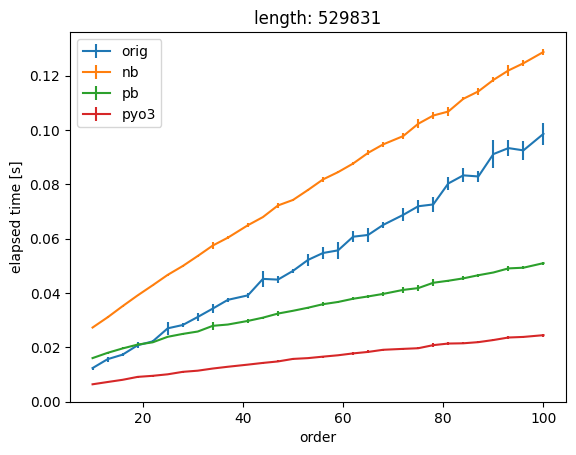

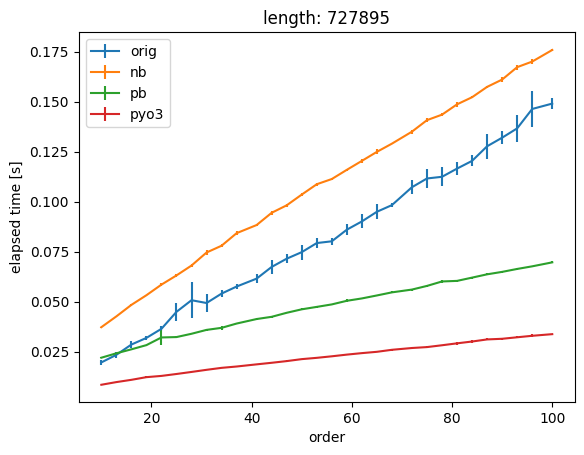

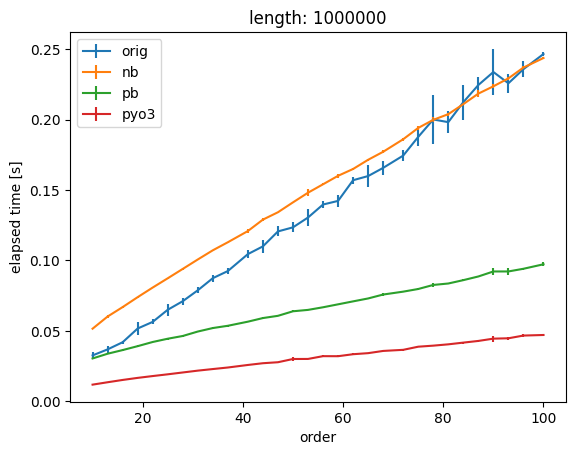

In [7]:
for length in lengths:
    plot_err = lambda df, label : plt.errorbar(orders, df[0].loc[length], df[1].loc[length], label=label)
    plot_err(orig_df, "orig")
    plot_err(nb_df, "nb")
    plot_err(pb_df, "pb")
    plot_err(pyo3_df, "pyo3")
    plt.legend(loc="best")
    plt.xlabel("order")
    plt.ylabel("elapsed time [s]")
    plt.title(f"length: {length}")
    plt.show()

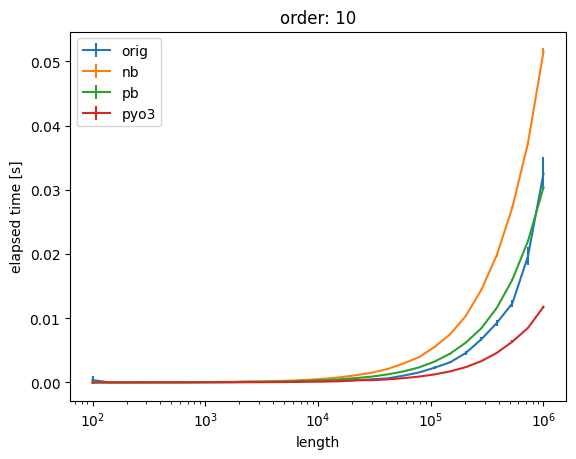

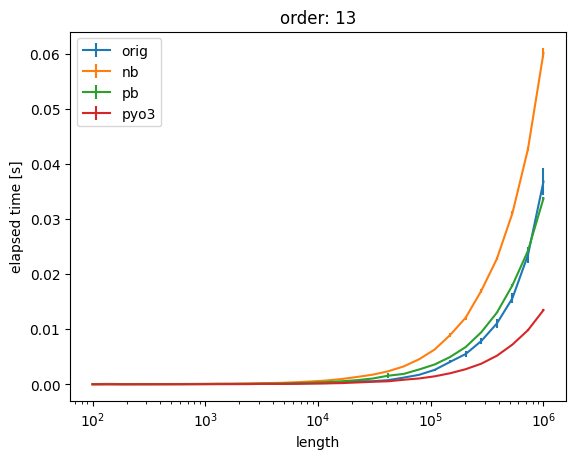

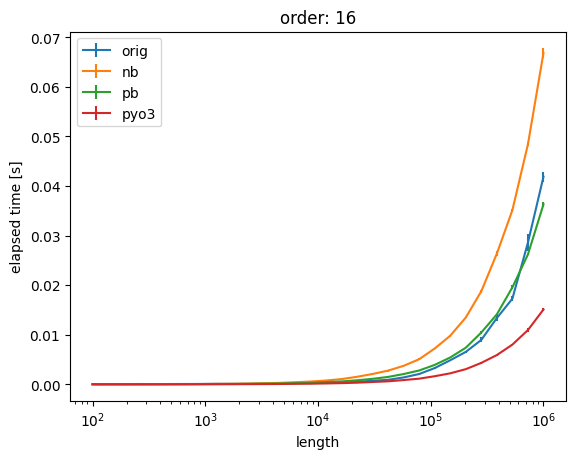

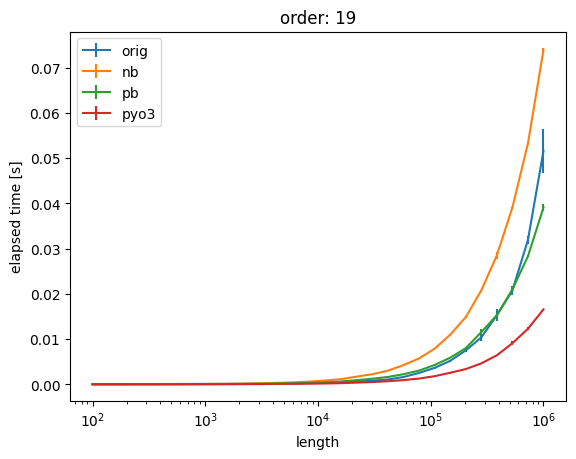

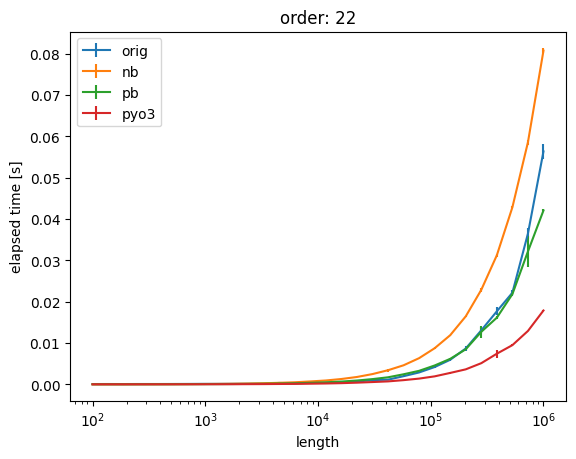

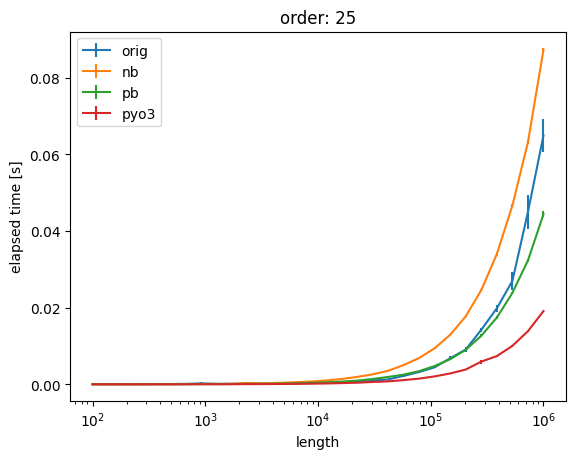

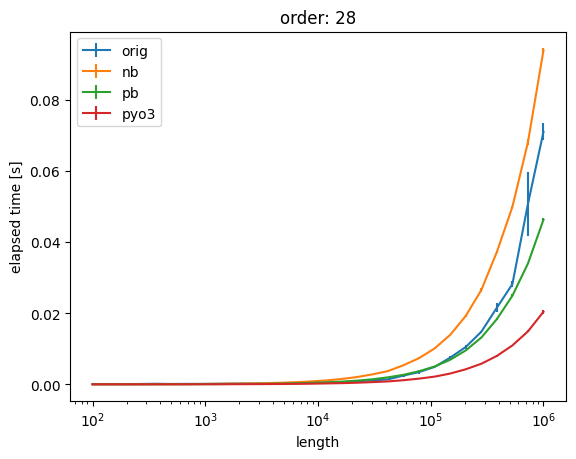

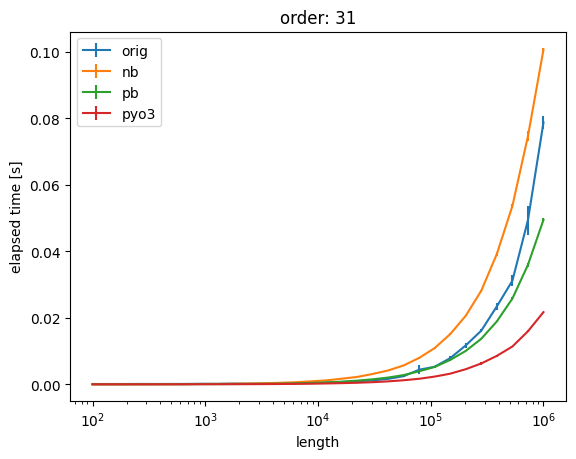

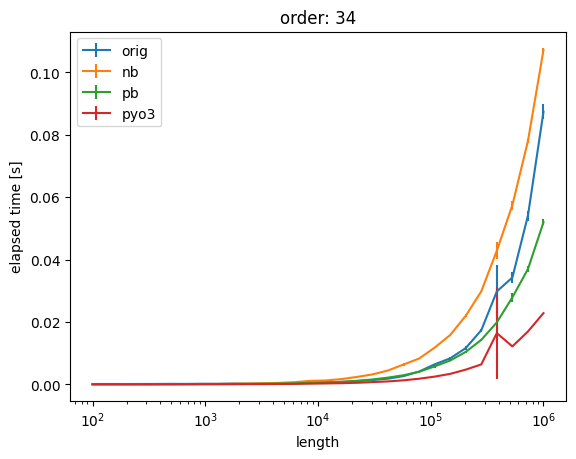

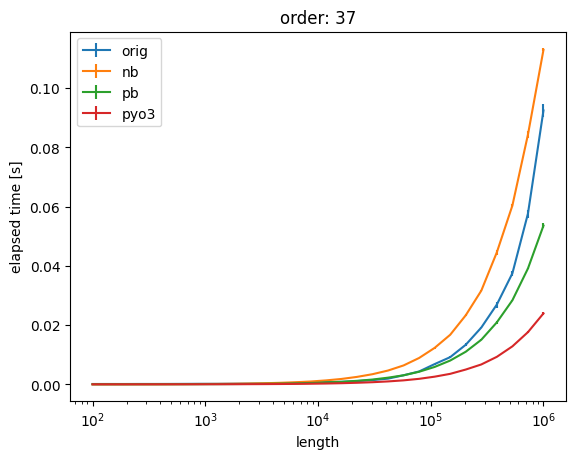

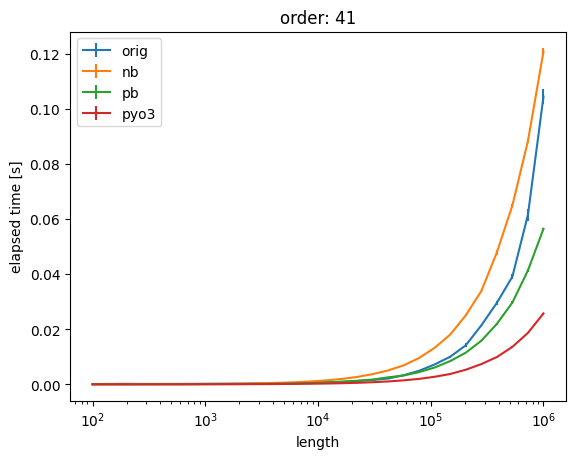

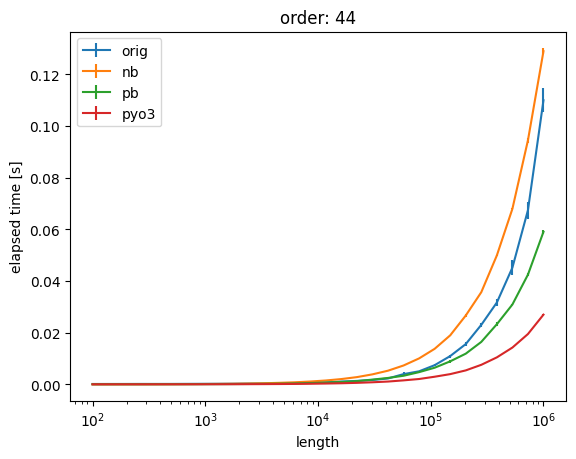

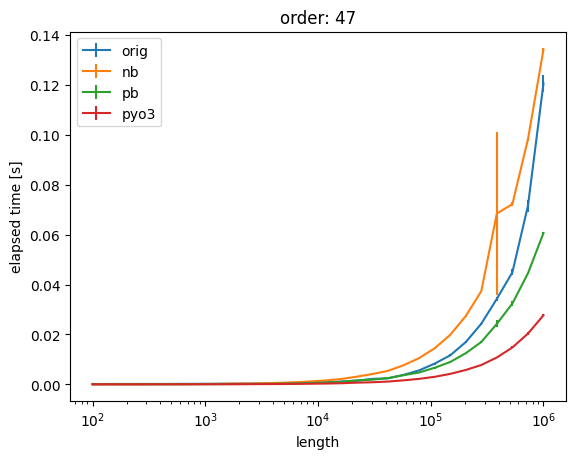

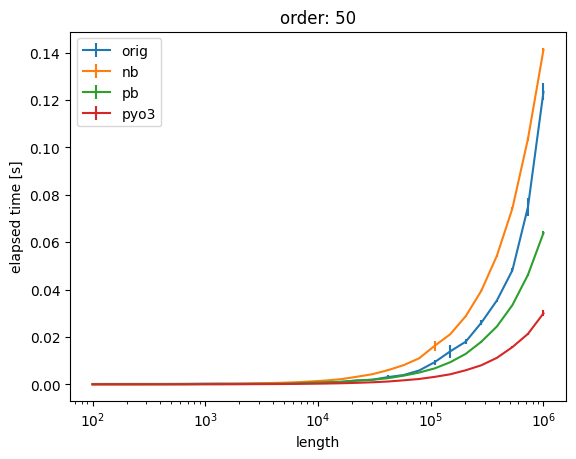

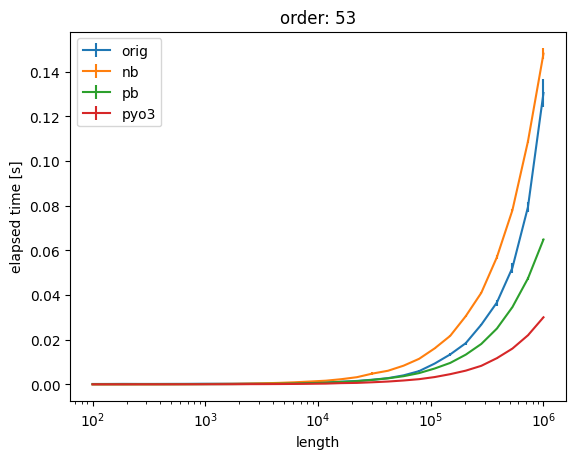

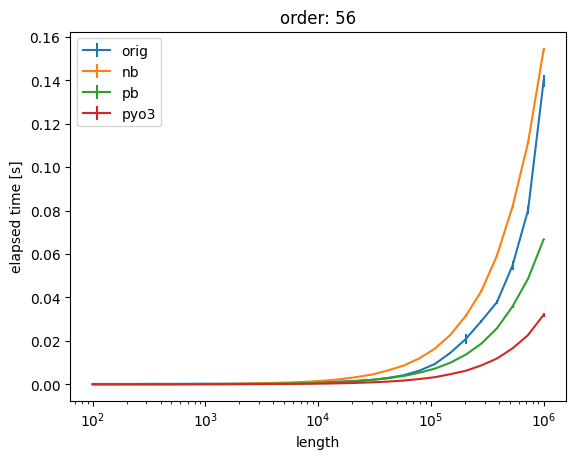

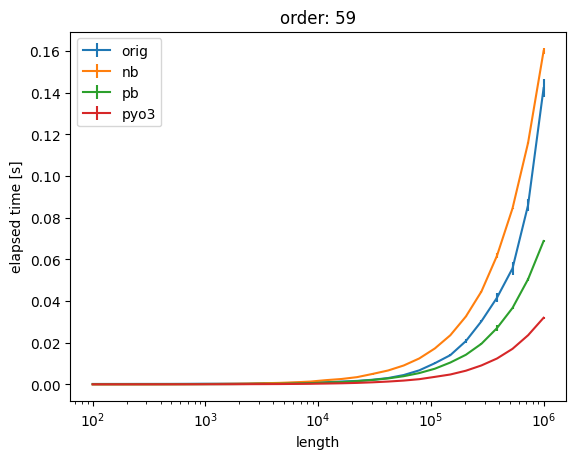

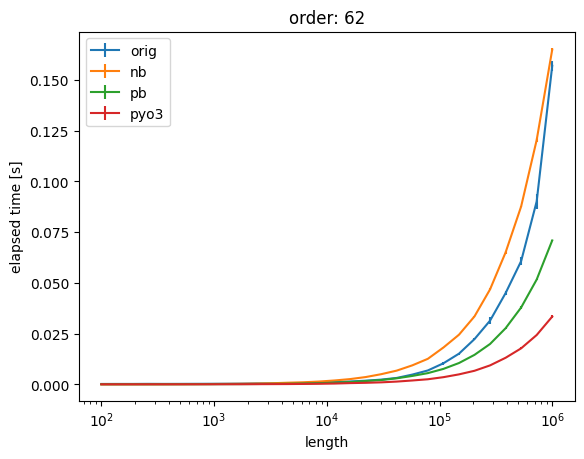

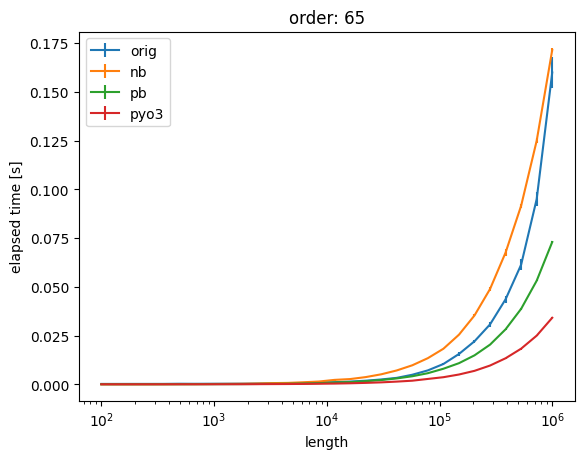

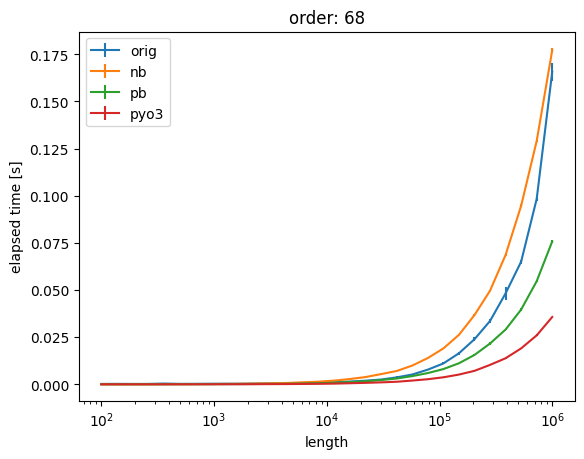

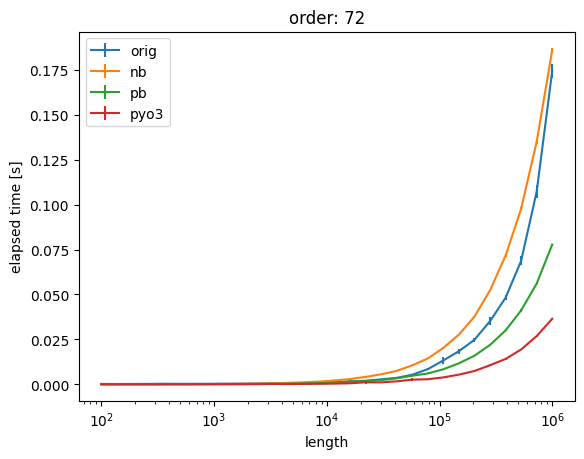

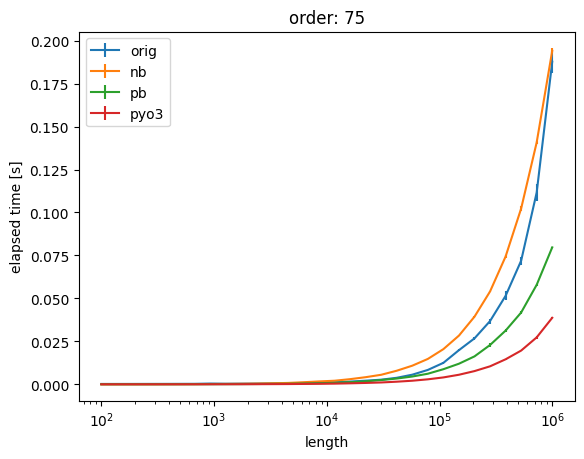

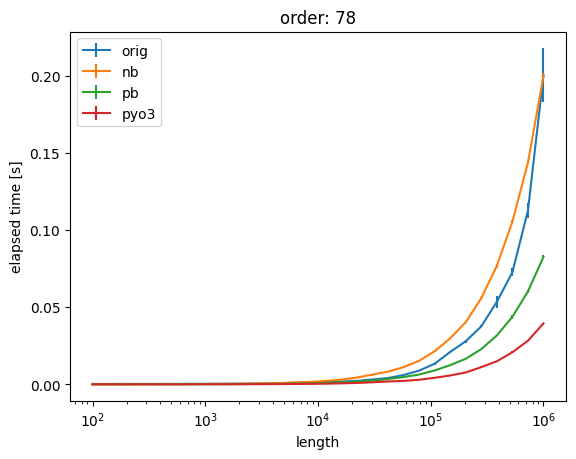

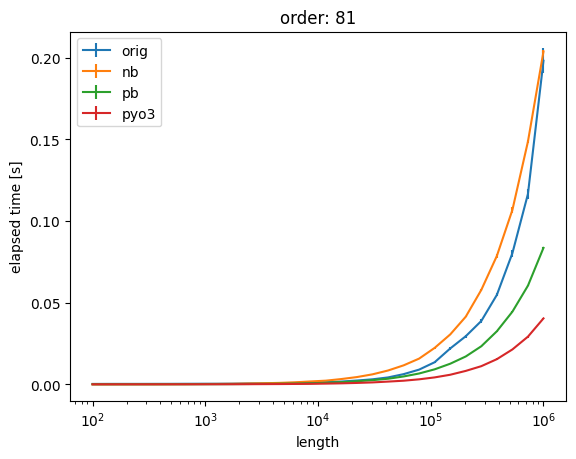

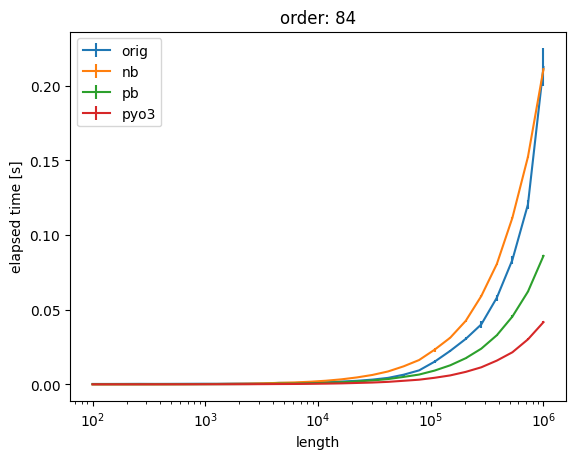

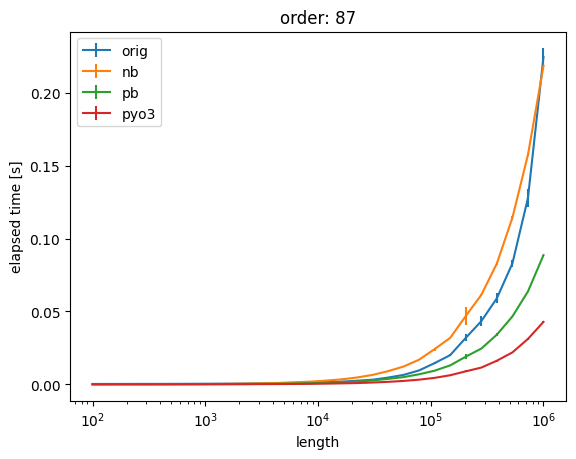

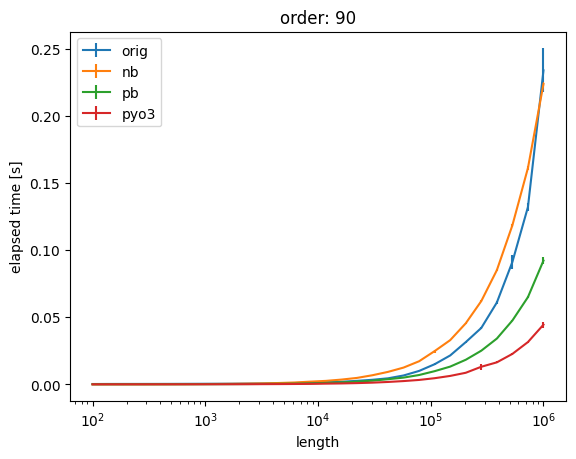

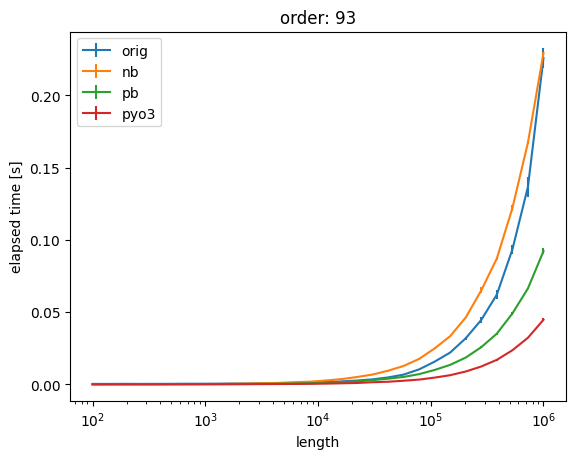

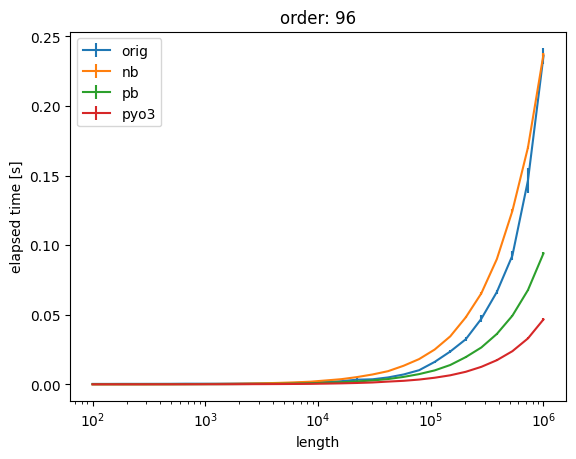

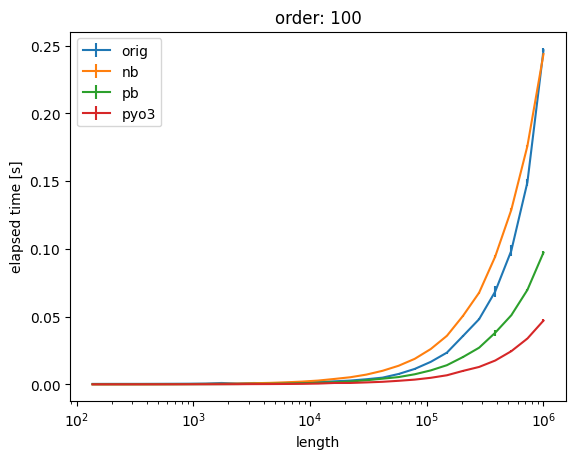

In [8]:
for order in orders:
    plot_err = lambda df, label : plt.errorbar(lengths, df[0].loc[:, order], df[1].loc[:, order], label=label)
    plot_err(orig_df, "orig")
    plot_err(nb_df, "nb")
    plot_err(pb_df, "pb")
    plot_err(pyo3_df, "pyo3")
    plt.legend(loc="best")
    plt.xscale("log")
    plt.xlabel("length")
    plt.ylabel("elapsed time [s]")
    plt.title(f"order: {order}")
    plt.show()